# **Importing Required Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import zipfile
import random
import pandas as pd
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from collections import Counter
import shutil
from PIL import Image

# **Extract the ZIP File**

In [ ]:
import zipfile
import os

zip_file_path = "/content/archive (1).zip"  # Update with your ZIP file name
extract_to = "./dataset"  # Target directory for extraction\
# Extract ZIP file
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Files extracted to: {extract_to}")
else:
    print("Error: ZIP file not found!")





Files extracted to: ./dataset


# **Loading the Dataset**

In [ ]:
import tensorflow as tf

data_dir = "./dataset"

# Check if dataset directory is correct
if not os.path.exists(data_dir):
    print(f"Error: Directory {data_dir} does not exist!")
#load dataset as image
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)



Found 5932 files belonging to 4 classes.
Using 4746 files for training.


# ***dataset information***

In [ ]:
# Print dataset information
import os

dataset_path = "./dataset"

# Count images manually
total_images = 0
print("\n===== ACTUAL IMAGE COUNT PER CLASS =====")
for class_name in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        total_images += num_images
        print(f"Class: {class_name} | Images: {num_images}")
class_names = data.class_names
print(f"Classes in Dataset: {class_names}")
print(f"Total Batches: {len(data)}")


===== ACTUAL IMAGE COUNT PER CLASS =====
Class: Bacterialblight | Images: 1584
Class: Blast | Images: 1440
Class: Brownspot | Images: 1600
Class: Tungro | Images: 1308
Classes in Dataset: ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
Total Batches: 149


# **check size images**

In [ ]:
import os
import cv2
from collections import defaultdict

data_dir = "./dataset"  # Update with the correct dataset path
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]  # Get class names

image_types = defaultdict(int)  # Count different image formats
image_sizes = defaultdict(int)  # Count different image sizes save oringinal

total_images = 0

for category in categories:
    path = os.path.join(data_dir, category)

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        # Get file extension
        ext = os.path.splitext(img_name)[-1].lower()
        image_types[ext] += 1

        try:
            img = cv2.imread(img_path)
            if img is not None:
                height, width, _ = img.shape  # Get image dimensions
                image_sizes[(width, height)] += 1
                total_images += 1
            else:
                print(f" Skipping unreadable image: {img_path}")
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# Print summary
print("\n===== IMAGE SUMMARY =====")
print(f"Total Images: {total_images}\n")

print("Image Types:")
for ext, count in image_types.items():
    print(f"  {ext}: {count}")

print("\nImage Sizes:")
for size, count in image_sizes.items():
    print(f"  {size}: {count}")



===== IMAGE SUMMARY =====
Total Images: 5932

Image Types:
  .jpg: 5932

Image Sizes:
  (300, 300): 4624
  (517, 344): 4
  (295, 221): 12
  (544, 362): 3
  (210, 280): 3
  (283, 212): 2
  (538, 358): 4
  (332, 499): 8
  (571, 381): 9
  (309, 412): 3
  (331, 497): 10
  (333, 498): 3
  (422, 281): 2
  (256, 342): 2
  (537, 358): 8
  (293, 220): 3
  (279, 418): 3
  (296, 222): 6
  (426, 284): 9
  (329, 495): 3
  (497, 331): 9
  (219, 292): 9
  (257, 386): 5
  (268, 401): 2
  (287, 215): 6
  (521, 348): 11
  (535, 357): 2
  (317, 238): 8
  (330, 494): 2
  (417, 278): 2
  (288, 216): 11
  (536, 357): 7
  (381, 571): 10
  (237, 317): 4
  (333, 500): 3
  (319, 479): 7
  (346, 518): 3
  (331, 495): 3
  (213, 286): 3
  (310, 232): 3
  (347, 519): 4
  (386, 257): 4
  (538, 359): 9
  (296, 445): 2
  (220, 294): 4
  (480, 320): 4
  (249, 374): 6
  (297, 445): 2
  (359, 538): 9
  (477, 318): 3
  (254, 381): 2
  (280, 210): 2
  (474, 317): 6
  (478, 320): 2
  (223, 298): 8
  (352, 528): 5
  (340, 5

# **resize images**

In [ ]:
import cv2
import os

# Set the image size and folder path
image_size = (244, 244)
folder_path = "./dataset"

# Function to resize images
def resize_images(folder):
    for category in os.listdir(folder):  # Loop through class folders
        category_path = os.path.join(folder, category)

        if os.path.isdir(category_path):  # Check if it's a folder
            for file in os.listdir(category_path):  # Loop through images
                file_path = os.path.join(category_path, file)

                img = cv2.imread(file_path)  # Read image
                if img is not None:  # Check if image is valid
                    img = cv2.resize(img, image_size)  # Resize image
                    cv2.imwrite(file_path, img)  # Save resized image
                else:
                    print(f"Skipping: {file_path}")  # Print if image is invalid

# Run the function
resize_images(folder_path)
print(" All images resized to 244x244")

 All images resized to 244x244


# **check misssing **
it wii be removed if it have missing

In [ ]:
import os
from PIL import Image

# ✅ Dataset is in the current directory
dataset_path = "./dataset"
valid_extensions = ('.jpg', '.jpeg', '.png')

# ✅ Expected image counts (update if needed)
expected_counts = {
    "Blast": 1440,
    "Bacterialblight": 1584,
    "Brownspot": 1600,
    "Tungro": 1308
}

print("\n===== CHECKING & DELETING ONLY INVALID IMAGES =====")
for class_name, expected_count in expected_counts.items():
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        print(f"\nChecking class: {class_name}")
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(valid_extensions)]

        deleted_count = 0

        for file_name in image_files:
            file_path = os.path.join(class_path, file_name)

            # Delete if empty
            if os.path.getsize(file_path) == 0:
                os.remove(file_path)
                deleted_count += 1
                print(f" - Deleted empty file: {file_path}")
                continue

            try:
                with Image.open(file_path) as img:
                    img.verify()
            except Exception as e:
                os.remove(file_path)
                deleted_count += 1
                print(f" - Deleted corrupted file: {file_path} ({e})")

        # Recount after cleanup
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(valid_extensions)]
        actual_count = len(image_files)
        missing_count = expected_count - actual_count

        print(f"Results for {class_name}:")
        print(f" - Expected: {expected_count}")
        print(f" - Actual after cleanup: {actual_count}")
        print(f" - Deleted invalid files: {deleted_count}")
        if missing_count > 0:
            print(f" - Missing: {missing_count} image(s).")
        else:
            print(" - All expected images are present and valid.")

print("\n===== FINAL CHECK COMPLETE =====")



===== CHECKING & DELETING ONLY INVALID IMAGES =====

Checking class: Blast
Results for Blast:
 - Expected: 1440
 - Actual after cleanup: 1440
 - Deleted invalid files: 0
 - All expected images are present and valid.

Checking class: Bacterialblight
Results for Bacterialblight:
 - Expected: 1584
 - Actual after cleanup: 1584
 - Deleted invalid files: 0
 - All expected images are present and valid.

Checking class: Brownspot
Results for Brownspot:
 - Expected: 1600
 - Actual after cleanup: 1600
 - Deleted invalid files: 0
 - All expected images are present and valid.

Checking class: Tungro
Results for Tungro:
 - Expected: 1308
 - Actual after cleanup: 1308
 - Deleted invalid files: 0
 - All expected images are present and valid.

===== FINAL CHECK COMPLETE =====


# **check corrupted imaged **

In [ ]:
from PIL import Image

def check_corrupted_images(directory):
    corrupted_files = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                try:
                    img = Image.open(file_path)
                    img.verify()  # Check if image is valid
                except:
                    print(f" Corrupted file detected: {file_path}")
                    corrupted_files.append(file_path)

    return corrupted_files

corrupted_files = check_corrupted_images(dataset_path)

if corrupted_files:
    print("\n===== CORRUPTED IMAGE REPORT =====")
    for file in corrupted_files:
        print(f"Removing: {file}")
        os.remove(file)  # Remove corrupted images

    print(f" Removed {len(corrupted_files)} corrupted images.")
else:
    print("No corrupted images found!")


No corrupted images found!


# **visualize sample images **

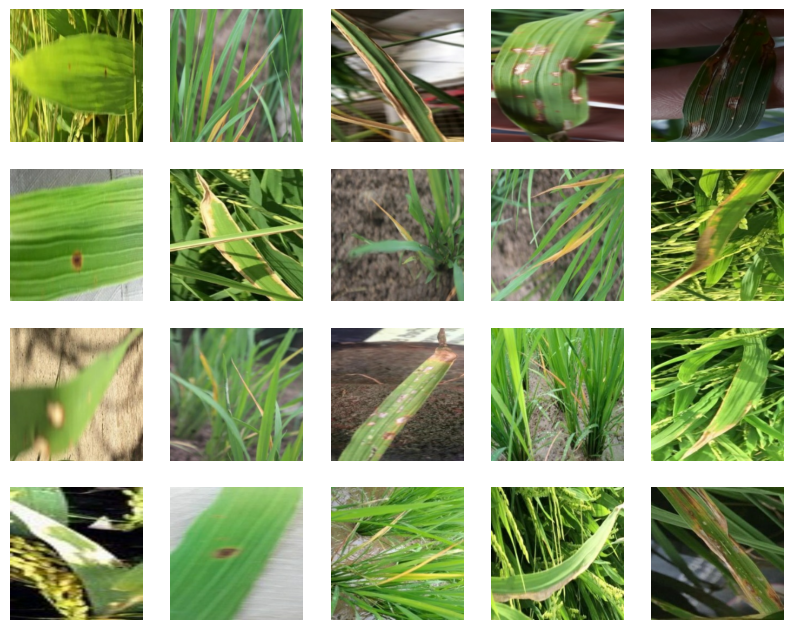

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 10))
for images, _ in data.take(1):  # Get the first batch
    for i in range(20):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')

plt.show()

# **visualize images per class**

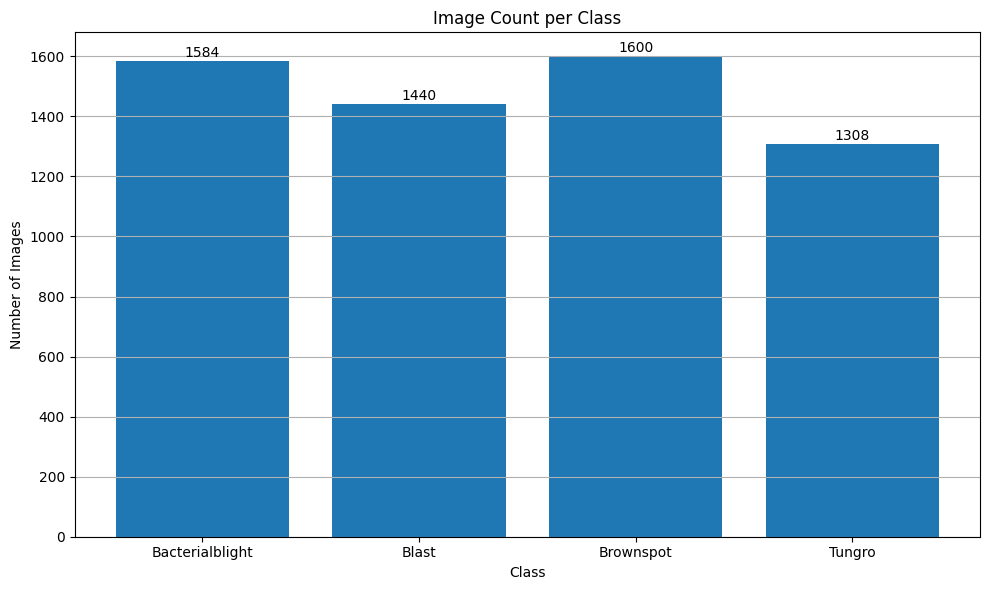

In [ ]:
import os
import matplotlib.pyplot as plt

# Dataset path
dataset_path = "./dataset"
valid_extensions = ('.png', '.jpg', '.jpeg')

# Count images
class_counts = {}
for class_name in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if f.lower().endswith(valid_extensions)])
        class_counts[class_name] = count

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values())

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha='center', va='bottom')

plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **class weights **

In [ ]:
import os

# Define dataset directory
data_dir = "./dataset"

# Get categories (classes)
categories = [cat for cat in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cat))]

# Count images per class
class_counts = {cat: len([f for f in os.listdir(os.path.join(data_dir, cat))
                          if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
                for cat in categories}

# Avoid division by zero
total = sum(class_counts.values())

# Compute class weights
class_weights = {i: total / (len(categories) * count) if count > 0 else 0
                 for i, (cat, count) in enumerate(class_counts.items())}

# Print class weights
print("Class Weights:", class_weights)


Class Weights: {0: 0.9362373737373737, 1: 0.926875, 2: 1.1337920489296636, 3: 1.0298611111111111}


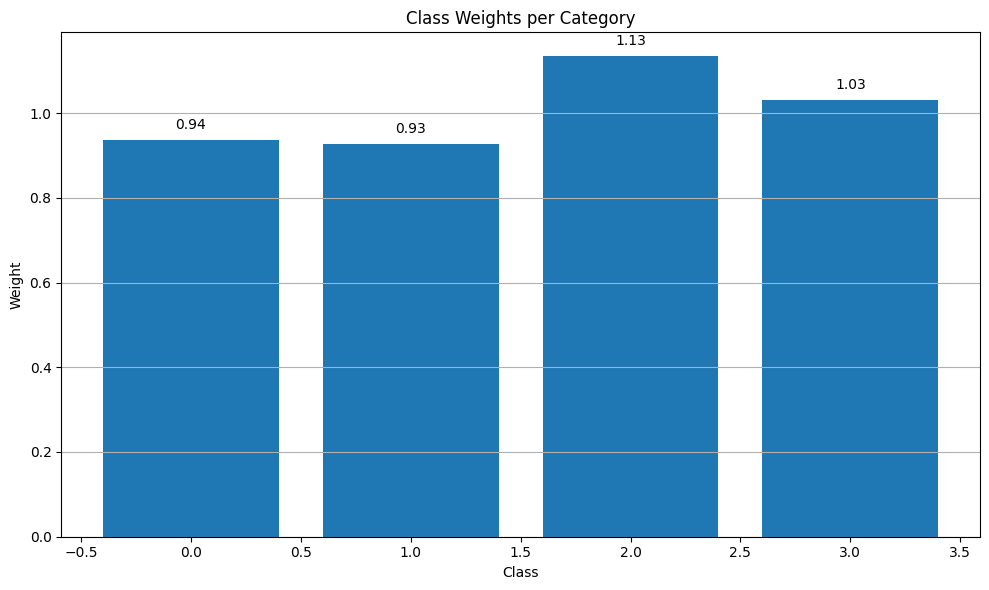

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(class_weights.keys(), class_weights.values())

# Add weight values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

plt.title("Class Weights per Category")
plt.xlabel("Class")
plt.ylabel("Weight")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **slite data to train,validation,test**
70% train,15 %validation,15% test

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path

original_data_dir = Path("./dataset")
split_base = Path("/content/leaf_dataset_split")
(train_dir, val_dir, test_dir) = [split_base / split for split in ["train", "val", "test"]]

# Clear any previous splits
for d in [train_dir, val_dir, test_dir]:
    if d.exists():
        shutil.rmtree(d)
    d.mkdir(parents=True, exist_ok=True)

# Split each class
for class_dir in original_data_dir.iterdir():
    if class_dir.is_dir():
        images = list(class_dir.glob("*.jpg")) + list(class_dir.glob("*.jpeg")) + list(class_dir.glob("*.png"))
        train_files, temp = train_test_split(images, train_size=0.7, random_state=42)
        val_files, test_files = train_test_split(temp, test_size=0.5, random_state=42)  # 15% each

        for name, files in zip(["train", "val", "test"], [train_files, val_files, test_files]):
            target = split_base / name / class_dir.name
            target.mkdir(parents=True, exist_ok=True)
            for f in files:
                shutil.copy(f, target / f.name)


# **Loading and Preprocessing Image Data for Training, Validation, and Testing in TensorFlow"**

In [ ]:
import tensorflow as tf

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 2986 files belonging to 4 classes.
Found 641 files belonging to 4 classes.
Found 641 files belonging to 4 classes.


In [ ]:
print(f"Number of training batches: {len(train_ds)}")
print(f"Number of validation batches: {len(val_ds)}")
print(f"Number of test batches: {len(test_ds)}")

Number of training batches: 94
Number of validation batches: 21
Number of test batches: 21


# **Setting Random Seeds for Reproducibility**
Ensuring that experiments and results can be repeated with the same outcome.
It ensures that every time you run your program, the results (like data augmentation or model training) will be the same

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

# Set random seeds for reproducibility
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)  # Set hash seed for Python
np.random.seed(seed_value)  # Set seed for numpy
random.seed(seed_value)  # Set seed for Python's random module
tf.random.set_seed(seed_value)  # Set seed for TensorFlow


# **Setting Data Augmentations**
These transformations help the model generalize better and prevent overfitting

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformations
)

## **Normalize Data**:
1.   Optimize Data Loading: Caching, shuffling, and prefetching improve training speed by ensuring data is efficiently loaded and processed.
2. Scaling pixel values to a range of [0, 1] ensures the model trains faster and more effectively, as neural networks perform better when input data is normalized.



In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Preprocess training set
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

# Validation and test sets (no augmentation, only normalization)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(tf.data.AUTOTUNE)



In [ ]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, EfficientNetB0, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
import matplotlib.pyplot as plt
import numpy as np
import os

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6298 - loss: 1.0120

94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 145ms/step - accuracy: 0.6312 - loss: 1.0078 - val_accuracy: 0.9267 - val_loss: 0.1888 - learning_rate: 0.0010
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9081 - loss: 0.2550

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9083 - loss: 0.2547 - val_accuracy: 0.9657 - val_loss: 0.0859 - learning_rate: 0.0010
Epoch 3/10
93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9479 - loss: 0.1398

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9479 - loss: 0.1399 - val_accuracy: 0.9766 - val_loss: 0.0703 - learning_rate: 0.0010
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9667 - loss: 0.0991

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9667 - loss: 0.0991 - val_accuracy: 0.9969 - val_loss: 0.0303 - learning_rate: 0.0010
Epoch 5/10
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9728 - loss: 0.0798

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9729 - loss: 0.0797 - val_accuracy: 0.9969 - val_loss: 0.0277 - learning_rate: 0.0010
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9788 - loss: 0.0647

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9789 - loss: 0.0646 - val_accuracy: 0.9938 - val_loss: 0.0205 - learning_rate: 0.0010
Epoch 7/10
93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9886 - loss: 0.0421

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9885 - loss: 0.0421 - val_accuracy: 0.9969 - val_loss: 0.0134 - learning_rate: 0.0010
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9895 - loss: 0.0344

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 1.0000 - val_loss: 0.0081 - learning_rate: 0.0010
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9854 - loss: 0.0361 - val_accuracy: 0.9984 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 10/10
93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9882 - loss: 0.0398

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9882 - loss: 0.0397 - val_accuracy: 0.9984 - val_loss: 0.0055 - learning_rate: 0.0010


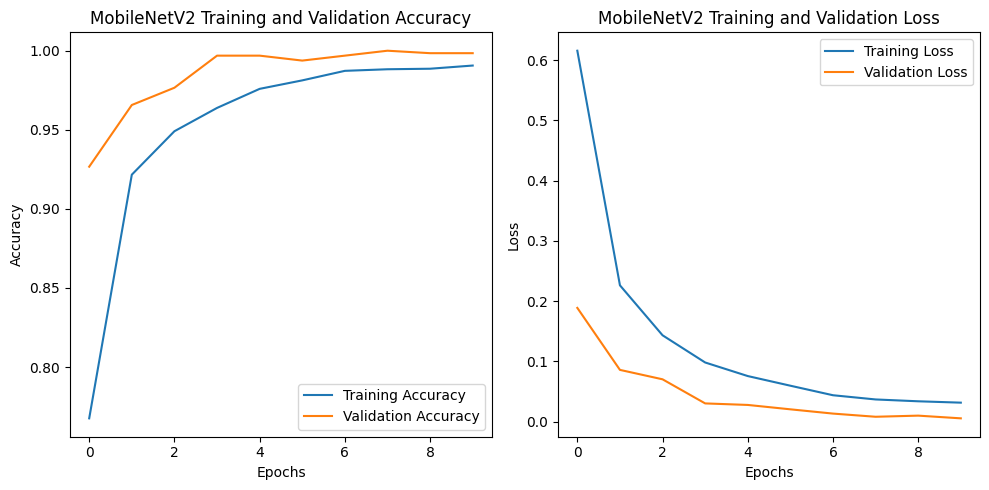

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9953 - loss: 0.0128
MobileNetV2 Test Accuracy: 1.00


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
import matplotlib.pyplot as plt


# MobileNetV2 Model (Transfer Learning)
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_mobilenetv2.trainable = False  # Freeze the base model

# Build the custom model
mobilenetv2_model = Sequential([
    base_model_mobilenetv2,
    GlobalAveragePooling2D(),  # Reduce the output to a fixed-size vector
    Dense(256, activation='relu'),
    Dropout(0.7),  # Regularization to prevent overfitting
    Dense(4, activation='softmax')  # 10 classes for multi-class classification
])

# Compile the model
mobilenetv2_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define Learning Rate Scheduler to decrease the learning rate during training
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:  # Reduce learning rate every 10 epochs
        lr = lr * 0.1
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Define ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_mobilenetv2_model.h5', save_best_only=True, monitor='val_loss')

# Train the model with callbacks
history_mobilenetv2 = mobilenetv2_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stopping, lr_schedule, model_checkpoint]
)

# Plotting Training and Validation Accuracy and Loss
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_mobilenetv2.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenetv2.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_mobilenetv2.history['loss'], label='Training Loss')
plt.plot(history_mobilenetv2.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_acc = mobilenetv2_model.evaluate(test_ds)
print(f"MobileNetV2 Test Accuracy: {test_acc:.2f}")



# **buid model**


# *VGG16 Model*

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 293ms/step - accuracy: 0.4153 - loss: 1.5836 - val_accuracy: 0.7457 - val_loss: 0.7345
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.6771 - loss: 0.8007 - val_accuracy: 0.7941 - val_loss: 0.5661
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.7472 - loss: 0.6387 - val_accuracy: 0.8268 - val_loss: 0.4641
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.8027 - loss: 0.5134 - val_accuracy: 0.8362 - val_loss: 0.4028
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.8138 - loss: 0.4758 - val_accuracy: 0.8471 - val_loss: 0.3683
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.8180 - loss: 0.4333 - val_accuracy: 0.8768 - val_loss: 0.3414
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.8465 - loss: 0.3921 - val_accuracy: 0.8736 - val_loss: 0.3091
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 196m

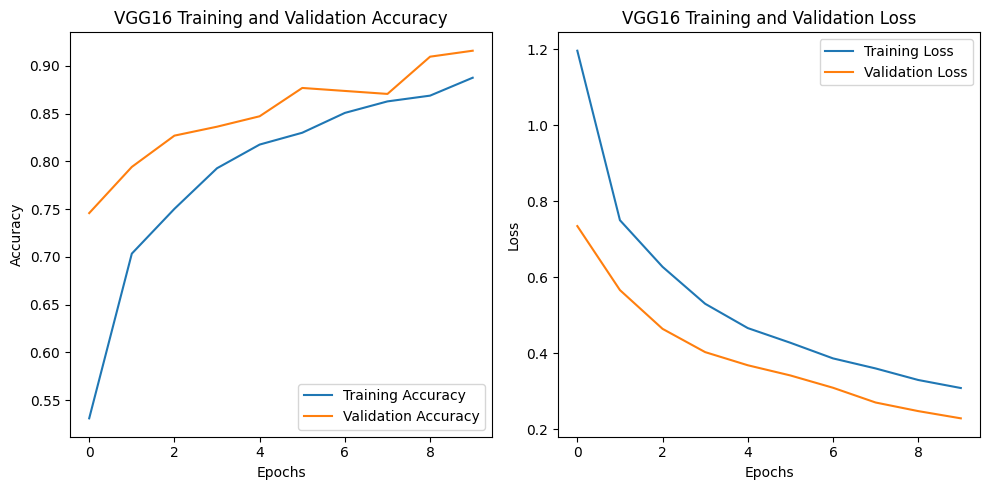

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9416 - loss: 0.2110
VGG16 Test Accuracy: 0.93


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# VGG16 Model (Transfer Learning)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg16.trainable = False  # Freeze base model

vgg16_model = Sequential([
    base_model_vgg16,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(10, activation='softmax')  # Assuming 10 classes
])

# Compile the model
vgg16_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define Learning Rate Scheduler to decrease the learning rate during training
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:  # Reduce learning rate every 10 epochs
        lr = lr * 0.1
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Train the model
history_vgg16 = vgg16_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Plotting Training and Validation Accuracy and Loss for VGG16
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], label='Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_acc = vgg16_model.evaluate(test_ds)
print(f"VGG16 Test Accuracy: {test_acc:.2f}")


# DenseNet121 *Model*

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 60s 410ms/step - accuracy: 0.6287 - loss: 0.9929 - val_accuracy: 0.9314 - val_loss: 0.2172
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.8970 - loss: 0.2961 - val_accuracy: 0.9688 - val_loss: 0.0946
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9544 - loss: 0.1467 - val_accuracy: 0.9938 - val_loss: 0.0514
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9741 - loss: 0.1006 - val_accuracy: 0.9922 - val_loss: 0.0341
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9751 - loss: 0.0733 - val_accuracy: 0.9984 - val_loss: 0.0223
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9764 - loss: 0.0692 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9913 - loss: 0.0402 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9942 - loss: 0.0278 - val_accuracy: 1.0000 

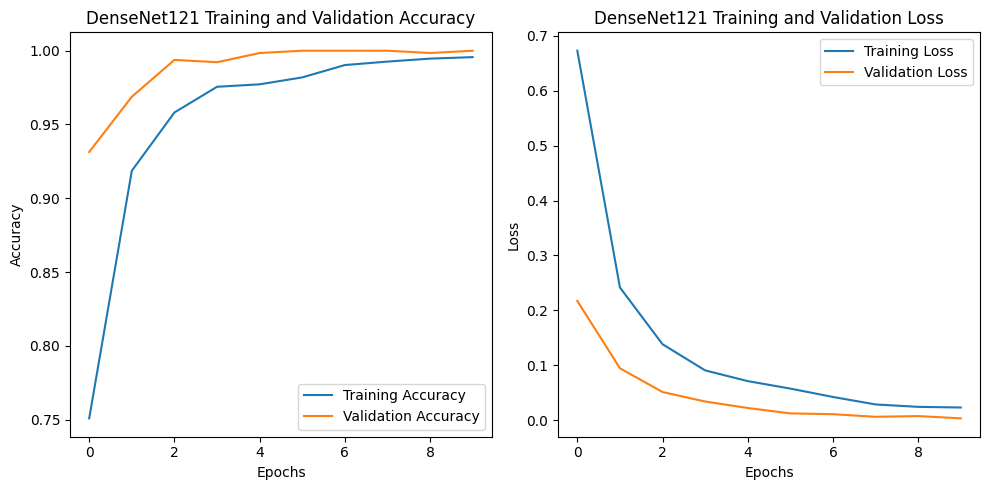

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9997 - loss: 0.0050
DenseNet121 Test Accuracy: 1.00


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D

# DenseNet121 Model (Transfer Learning)
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_densenet.trainable = False  # Freeze base model

densenet_model = Sequential([
    base_model_densenet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(4, activation='softmax')  # Assuming 10 classes
])

# Compile the model
densenet_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define Learning Rate Scheduler to decrease the learning rate during training
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:  # Reduce learning rate every 10 epochs
        lr = lr * 0.1
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Train the model
history_densenet = densenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Plotting Training and Validation Accuracy and Loss for DenseNet
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_densenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet121 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_densenet.history['loss'], label='Training Loss')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss')
plt.title('DenseNet121 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_acc = densenet_model.evaluate(test_ds)
print(f"DenseNet121 Test Accuracy: {test_acc:.2f}")


In [ ]:
# Save the model in HDF5 format (.h5)
densenet_model.save('densenet_model.h5')


Epoch 1/9
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.4984 - loss: 1.3315 - val_accuracy: 0.7676 - val_loss: 0.6773 - learning_rate: 0.0010
Epoch 2/9
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7456 - loss: 0.6905 - val_accuracy: 0.8440 - val_loss: 0.4483 - learning_rate: 0.0010
Epoch 3/9
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8208 - loss: 0.4696 - val_accuracy: 0.9360 - val_loss: 0.2481 - learning_rate: 0.0010
Epoch 4/9
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8955 - loss: 0.2766 - val_accuracy: 0.9454 - val_loss: 0.1497 - learning_rate: 0.0010
Epoch 5/9
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9346 - loss: 0.1885 - val_accuracy: 0.9329 - val_loss: 0.1756 - learning_rate: 0.0010
Epoch 6/9
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9305 - loss: 0.2060 - val_accuracy: 0.9470 - val_loss: 0.1375 - learning_rate: 0.0010
Epoch 7/9
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9625 - loss: 0.1070 - val_accuracy:

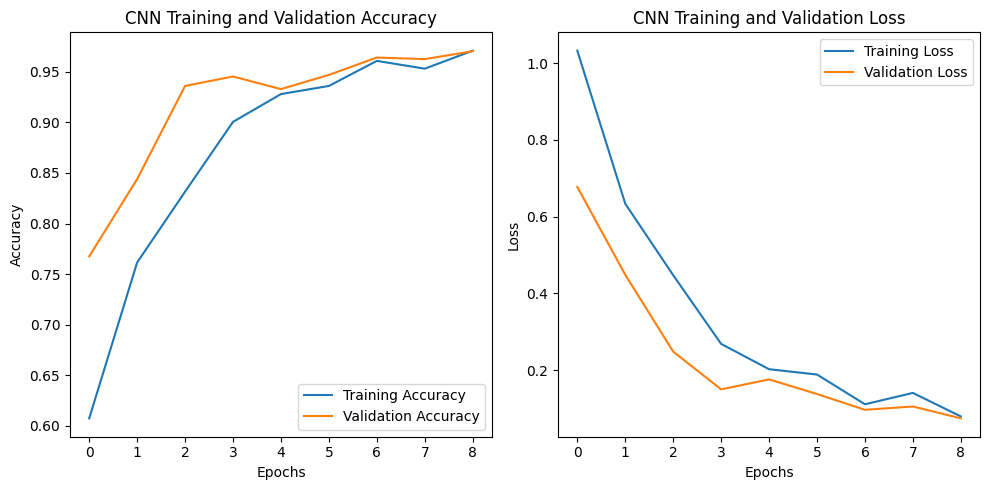

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9479 - loss: 0.1301
CNN Test Accuracy: 0.95


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.1
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Train the model
history_cnn = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=9,
    callbacks=[lr_schedule]
)

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_ds)
print(f"CNN Test Accuracy: {test_acc:.2f}")


# *MobileNetV2 Model*

#CNN
1. Create the Model:
The model is like a stack of layers. Here's

how it works:

*   Conv2D Layers: These layers help the model find important features (like edges or shapes) in the images.
*   MaxPooling2D Layers: These layers reduce the size of the image data, making the model faster.
*Flatten: This layer turns the image data into a flat list, so it can be used in the next step.
*Dense Layers: These are fully connected layers that help the model make predictions.
*Dropout: This layer helps prevent the model from overfitting by randomly "turning off" some parts of the network during training.






# Evaluate the Model

# *CNN*

# mobilenetv2_model

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step


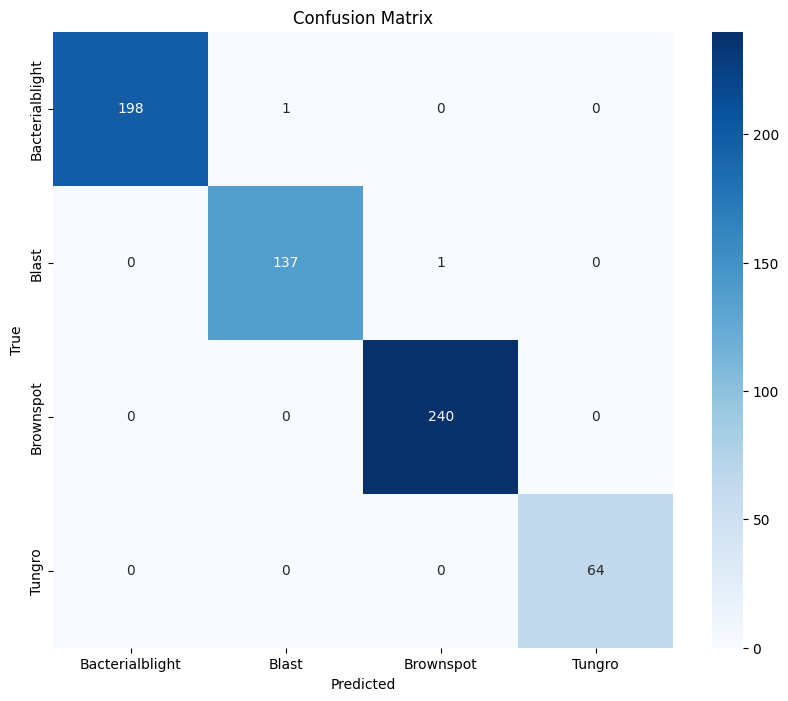

In [ ]:
import numpy as np
import sklearn.metrics as m
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)  # True labels from the test dataset
predictions =mobilenetv2_model.predict(test_ds)  # Model predictions
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Compute confusion matrix
cm = m.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       199
          Blast       1.00      0.99      1.00       138
      Brownspot       1.00      1.00      1.00       240
         Tungro       1.00      1.00      1.00        64

       accuracy                           1.00       641
      macro avg       1.00      1.00      1.00       641
   weighted avg       1.00      1.00      1.00       641



# Densenet_model

21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 570ms/step


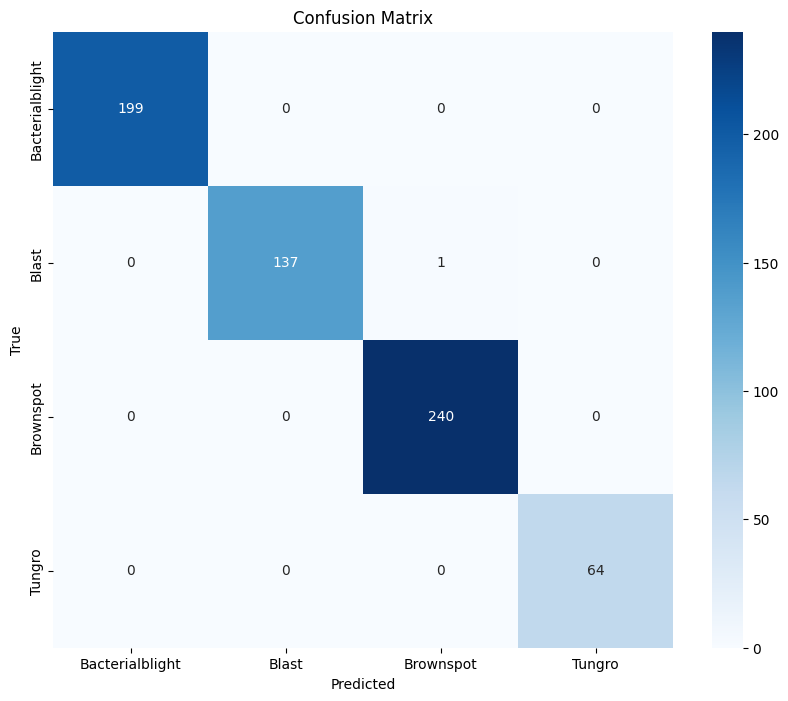

In [ ]:
import numpy as np
import sklearn.metrics as m
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)  # True labels from the test dataset
predictions = densenet_model .predict(test_ds)  # Model predictions
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Compute confusion matrix
cm = m.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       199
          Blast       1.00      0.99      1.00       138
      Brownspot       1.00      1.00      1.00       240
         Tungro       1.00      1.00      1.00        64

       accuracy                           1.00       641
      macro avg       1.00      1.00      1.00       641
   weighted avg       1.00      1.00      1.00       641



# vgg16_model

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step


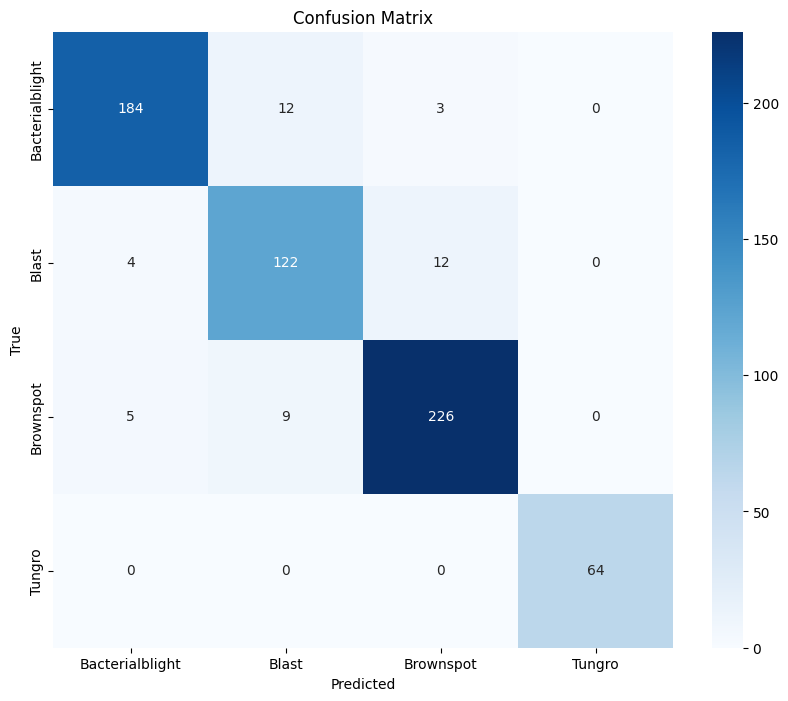

In [ ]:
import numpy as np
import sklearn.metrics as m
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)  # True labels from the test dataset
predictions = vgg16_model.predict(test_ds)  # Model predictions
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Compute confusion matrix
cm = m.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


                 precision    recall  f1-score   support

Bacterialblight       0.95      0.92      0.94       199
          Blast       0.85      0.88      0.87       138
      Brownspot       0.94      0.94      0.94       240
         Tungro       1.00      1.00      1.00        64

       accuracy                           0.93       641
      macro avg       0.94      0.94      0.94       641
   weighted avg       0.93      0.93      0.93       641



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


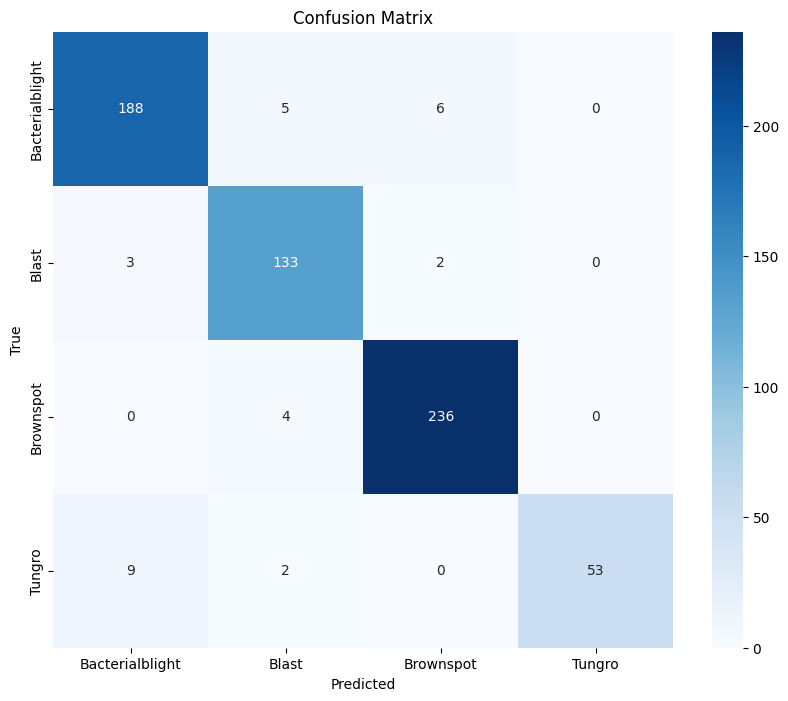

In [ ]:
import numpy as np
import sklearn.metrics as m
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)  # True labels from the test dataset
predictions = cnn_model.predict(test_ds)  # Model predictions
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Compute confusion matrix
cm = m.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

                 precision    recall  f1-score   support

Bacterialblight       0.94      0.94      0.94       199
          Blast       0.92      0.96      0.94       138
      Brownspot       0.97      0.98      0.98       240
         Tungro       1.00      0.83      0.91        64

       accuracy                           0.95       641
      macro avg       0.96      0.93      0.94       641
   weighted avg       0.95      0.95      0.95       641

